 # Guy William Osborn

# Part One: Introduction - Research Interest

Are research interest is to discover how productivity changes in the countries listed below. The variables that we will be analyising include: the year, the amount of annual hours worked per worker, GDP per capita, population, vacation time alloted in non-agricultural activites, and output per hour worked (also known as labour productivity).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [9]:
d1 = pd.read_csv("../data/processed/cleaned_combined_data.csv")
d1.describe()

,Year,Annual working hours per worker,"GDP per capita (output, multiple price benchmarks)",Population (historical estimates),Days of vacation and holidays for full-time production workers in non-agricultural activities (Huberman & Minns 2007),Productivity: output per hour worked
count,910.000000,910.000000,910.000000,9.100000e+02,910.000000,910.000000
mean,1984.500000,1813.722399,27206.721949,4.652565e+07,29.353846,35.445676
std,20.216308,230.991059,14497.845555,6.231216e+07,6.763819,19.346748
min,1950.000000,1380.607643,3857.871568,2.807012e+06,18.000000,4.209353
25%,1967.000000,1645.725923,15217.292065,9.556052e+06,24.000000,19.232580
50%,1984.500000,1802.997862,24526.883720,2.572300e+07,29.000000,33.576284
75%,2002.000000,1963.398584,37603.623035,5.683147e+07,35.000000,49.750285
max,2019.000000,2428.279448,102622.448900,3.343197e+08,44.000000,125.092536


**Note**

We will be using both GDP per capita and output per hour worked even though they are both measures of productivity and produce similar correlations. It is important to distinguish between the two values:

GDP or Gross Domestic Product per capita considers government spending, government investment, imports, exports, private consumption, and gross private investment.

Whereas output per hour worked as it is a pure measure of labour productivity, only considering real output and hours worked by all persons, this includes employees, sole properitors, partnerships, and unpaid family workers. 

# Part Two: Explanatory Data Analysis 

In the Explanatory Data Analysis (EDA), we will perform our initial investigations into the data.

First of all, we will take a look at the shape, variables and general trends.

In [6]:
d1.shape

(910, 7)

In [7]:
d1.columns

Index(['Entity', 'Year', 'Annual working hours per worker',
       'GDP per capita (output, multiple price benchmarks)',
       'Population (historical estimates)',
       'Days of vacation and holidays for full-time production workers in non-agricultural activities (Huberman & Minns 2007)',
       'Productivity: output per hour worked'],
      dtype='object')

In [10]:
d1.head

<bound method NDFrame.head of      Entity  Year  Annual working hours per worker  \
0    Canada  1950                      2209.234041   
1    Canada  1951                      2194.183546   
2    Canada  1952                      2181.939348   
3    Canada  1953                      2180.528393   
4    Canada  1954                      2172.603665   
..      ...   ...                              ...   
905  Sweden  2015                      1620.925637   
906  Sweden  2016                      1634.169305   
907  Sweden  2017                      1621.472711   
908  Sweden  2018                      1620.734841   
909  Sweden  2019                      1605.276602   

     GDP per capita (output, multiple price benchmarks)  \
0                                          12878.90219    
1                                          13025.04615    
2                                          13720.40223    
3                                          13979.35187    
4                         

## Mathematical Trends of Dataset: 

Finding the mean, quartiles, median, min, max values of the presented data:

In [11]:
d1.nunique(axis=0)
d1.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Year,Annual working hours per worker,"GDP per capita (output, multiple price benchmarks)",Population (historical estimates),Days of vacation and holidays for full-time production workers in non-agricultural activities (Huberman & Minns 2007),Productivity: output per hour worked
count,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000
mean,1984.500000,1813.722399,27206.721949,46525647.295604,29.353846,35.445676
std,20.216308,230.991059,14497.845555,62312164.095569,6.763819,19.346748
min,1950.000000,1380.607643,3857.871568,2807012.000000,18.000000,4.209353
25%,1967.000000,1645.725923,15217.292065,9556052.500000,24.000000,19.232580
50%,1984.500000,1802.997862,24526.883720,25723000.000000,29.000000,33.576284
75%,2002.000000,1963.398584,37603.623035,56831468.000000,35.000000,49.750285
max,2019.000000,2428.279448,102622.448900,334319680.000000,44.000000,125.092536


The above table displays several different mathematical values of our processed data. 

Interestingly, it shows that the range of output per hour worked of our selected countries in specific years  ranges from as low as 4.21 to 125.10 (rounded to 2 decimal places). Additionally, it shows that the mean output per hour worked over the years is 35.45.

## Clean up of the EDA:

We will rename variables for ease of comprehension and reference:

In [40]:
d2 = d1.rename(columns={'Annual working hours per worker': 'Annual working hrs',  
                        'GDP per capita (output, multiple price benchmarks)': 'GDP', 
                        'Population (historical estimates)' : 'Population',
                        'Days of vacation and holidays for full-time production workers in non-agricultural activities (Huberman & Minns 2007)' : 'Days of Vacation',
                        'Productivity: output per hour worked': 'Labour Productivity'
                       }) 

In [41]:
d2.describe()

,Year,Annual working hrs,GDP,Population,Days of Vacation,Labour Productivity
count,910.000000,910.000000,910.000000,9.100000e+02,910.000000,910.000000
mean,1984.500000,1813.722399,27206.721949,4.652565e+07,29.353846,35.445676
std,20.216308,230.991059,14497.845555,6.231216e+07,6.763819,19.346748
min,1950.000000,1380.607643,3857.871568,2.807012e+06,18.000000,4.209353
25%,1967.000000,1645.725923,15217.292065,9.556052e+06,24.000000,19.232580
50%,1984.500000,1802.997862,24526.883720,2.572300e+07,29.000000,33.576284
75%,2002.000000,1963.398584,37603.623035,5.683147e+07,35.000000,49.750285
max,2019.000000,2428.279448,102622.448900,3.343197e+08,44.000000,125.092536


## Visualisation of Data and Relationships:

##### **1.Correlation Matrix**

This correlation matrix below will compare variables to each other to see if linear correlation relationships exists and if they are positive or negative.

<AxesSubplot: >

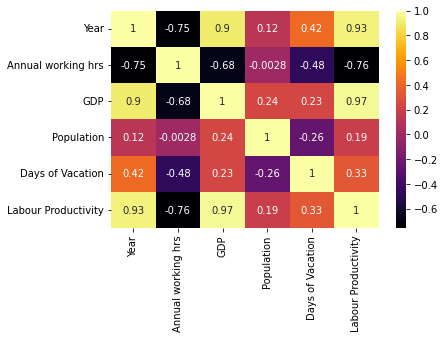

In [42]:
corr = d2.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap= 'inferno')

At first glance, this correlation matrix shows that the majority of data is close to 0, meaning there exists multiple non-existent correlations in our dataset. The strong correlations in the data include: 

- Strong positive correlations for labour productivity and years, meaning that over the years (1950 to 2019), the data indicates that selected countries have become more productive.
- Strong positive correlations for GDP and years, meaning that over the years (1950 to 2019), the data indicates that selected countries have become more productive, are exporting more to other countries, increasing their capital, and populations are more wealthy.
- Strong negative correlations for annual working hours and labour productivity. From this correlation, we can believe that the more hours that workers input does not always equal a higher output. From this, we can assume that quality is better than quantity and that is important for people to not be overworked. Same applies for GDP and annual working hours. 

This is great for us that productivity has interesting strong correlations with other variables.

**Note:**
- The brighter the colours are, the more positive the correlation.
- The darker the colours are, the more negative the correlation.
- -1 = perfect negative linear correlation
- 0 = non-existent linear correlation
- +1 = perfect positive linear correlation

##### **2.Labour Productivity Scatter Plots**

Since our research interest is to discover how productivity changes in the countries. It will be useful to highlight labour productivity compared to other variables in our dataset in scatter graph form. 

- The independent variable are the other variables.
- The dependent variable is output PHW

/opt/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='Population', ylabel='Labour Productivity'>

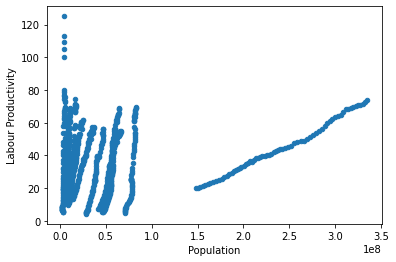

In [49]:
d2.plot(kind='scatter', x='Population', y='Labour Productivity')

**Correlation:** non-existent 

<AxesSubplot: xlabel='GDP', ylabel='Labour Productivity'>

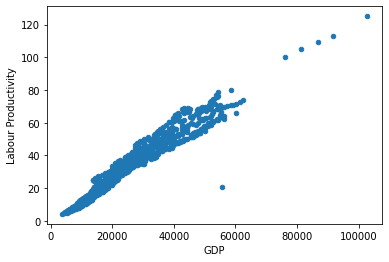

In [44]:
d2.plot(kind='scatter', x='GDP', y='Labour Productivity')

**Correlation:** strong positive 

<AxesSubplot: xlabel='Year', ylabel='Labour Productivity'>

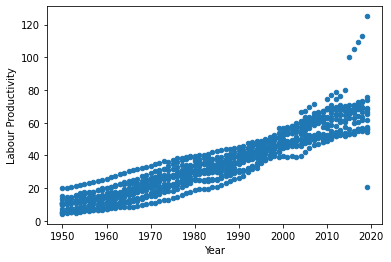

In [45]:
d2.plot(kind='scatter', x='Year', y='Labour Productivity')

**Correlation:** positive 

<AxesSubplot: xlabel='Days of Vacation', ylabel='Labour Productivity'>

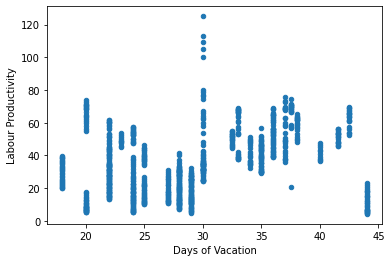

In [46]:
d2.plot(kind='scatter', x='Days of Vacation', y='Labour Productivity')

**Correlation:** non-existent 

**Note:** 30 days of vacation potientaly hints to be the ideal vacation amount for the best productivity.

<AxesSubplot: xlabel='Annual working hrs', ylabel='Labour Productivity'>

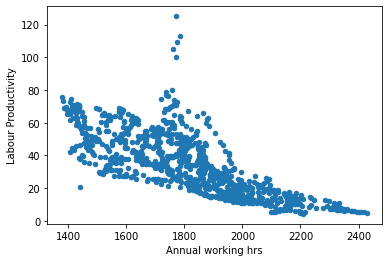

In [47]:
d2.plot(kind='scatter', x='Annual working hrs', y='Labour Productivity')

**Correlation:** negative 

##### **3.Scatter Plots for All Variables**

These scatter plots will compare all variables to each other. These graphs are an effective visualisation of correlation matrix relationship values. 

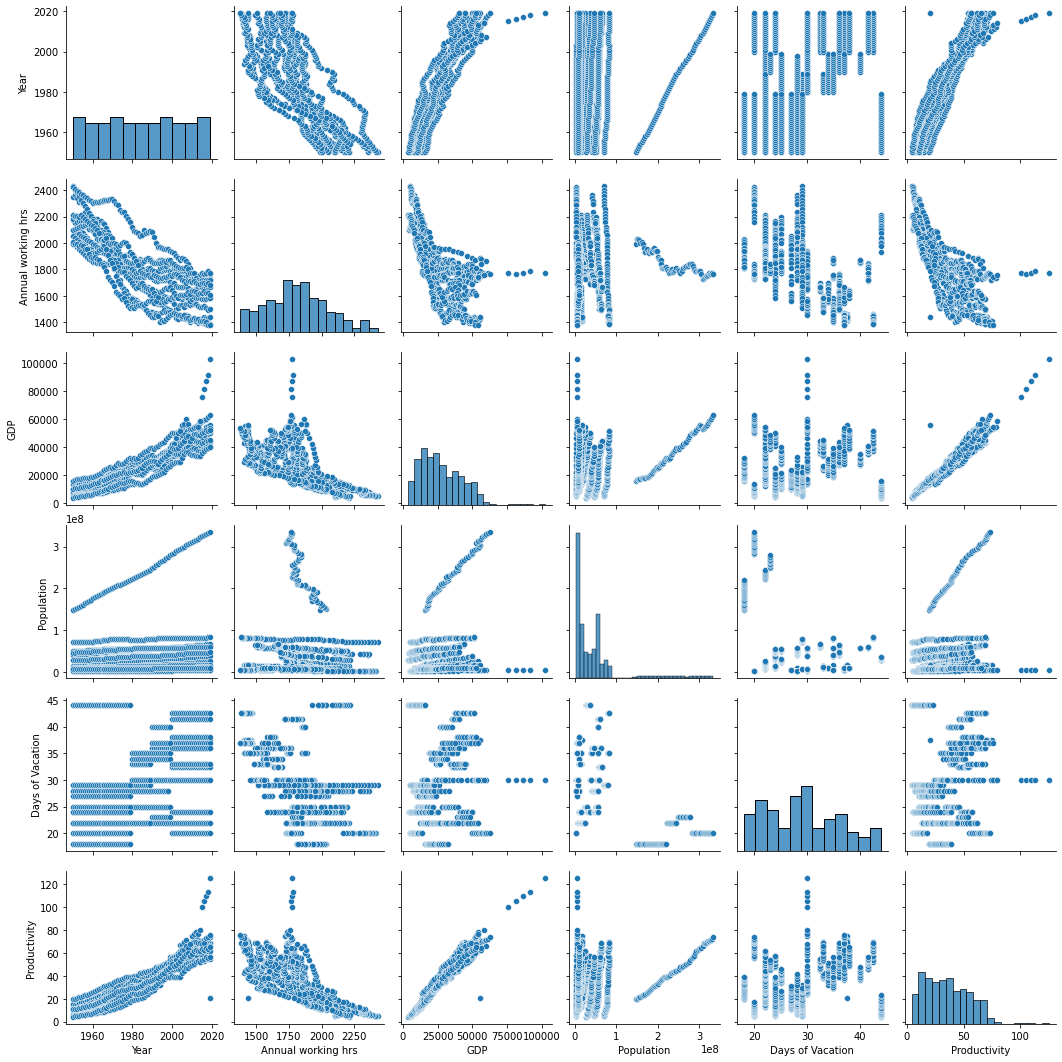

In [85]:
sns.pairplot(d2)

##### **4.Boxplots**

Boxplots are an useful visualisation and most importantly gives us a clean look at the outliers present in our dataset.

<AxesSubplot: >

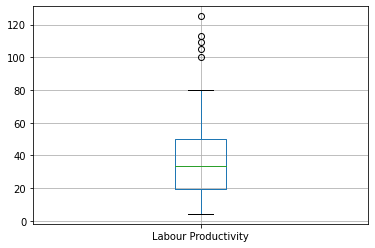

In [48]:
d2.boxplot('Labour Productivity')

<AxesSubplot: >

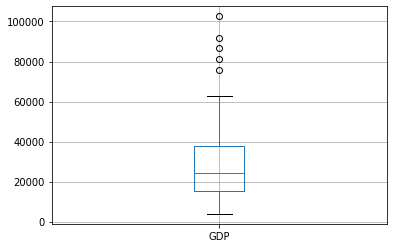

In [89]:
d2.boxplot('GDP')

<AxesSubplot: >

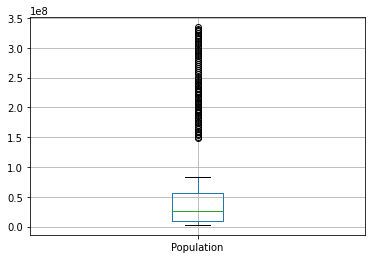

In [90]:
d2.boxplot('Population')

<AxesSubplot: >

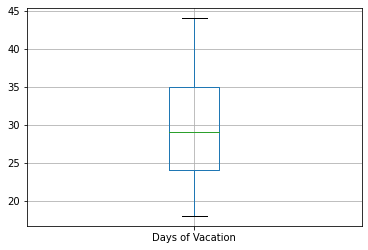

In [91]:
d2.boxplot('Days of Vacation')

<AxesSubplot: >

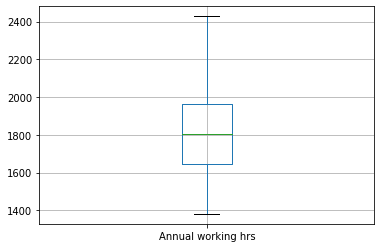

In [92]:
d2.boxplot('Annual working hrs')

# Part 3: Analysis Pipeline 

## Loading the Data:

In [50]:
d2.describe()

,Year,Annual working hrs,GDP,Population,Days of Vacation,Labour Productivity
count,910.000000,910.000000,910.000000,9.100000e+02,910.000000,910.000000
mean,1984.500000,1813.722399,27206.721949,4.652565e+07,29.353846,35.445676
std,20.216308,230.991059,14497.845555,6.231216e+07,6.763819,19.346748
min,1950.000000,1380.607643,3857.871568,2.807012e+06,18.000000,4.209353
25%,1967.000000,1645.725923,15217.292065,9.556052e+06,24.000000,19.232580
50%,1984.500000,1802.997862,24526.883720,2.572300e+07,29.000000,33.576284
75%,2002.000000,1963.398584,37603.623035,5.683147e+07,35.000000,49.750285
max,2019.000000,2428.279448,102622.448900,3.343197e+08,44.000000,125.092536


## Cleaning the Data:

What is immeditaley apparent in our dataset is the large amount of decimal points and messy values. We will sort this out and round everything to two decimal places: